## **Data Analysis Python Project :- Pizza Data Analysis** ##

#### **Import Libraries** ####

In [116]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

#### **Import Raw Data** ####

In [117]:
df_order_details = pd.read_csv(r"D:\Data Science UV Tech\Projects\Python project\order_details.csv")
df_order_details.head(1)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1


In [118]:
df_orders = pd.read_csv(r"D:\Data Science UV Tech\Projects\Python project\orders.csv")
df_orders.head(1)

,order_id,date,time
0,1,2015-01-01,11:38:36


In [119]:
df_pizza_types = pd.read_csv(r"D:\Data Science UV Tech\Projects\Python project\pizza_types.csv",encoding='latin1')
df_pizza_types.head(1)

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


In [120]:
df_pizzas = pd.read_csv(r"D:\Data Science UV Tech\Projects\Python project\pizzas.csv")
df_pizzas.head(1)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75


#### **Checking Shape of the Dataframes** ####

In [121]:
df_order_details.shape

(48620, 4)

In [122]:
df_orders.shape

(21350, 3)

In [123]:
df_pizza_types.shape

(32, 4)

In [124]:
df_pizzas.shape

(96, 4)

#### **Checking the Null Values in the Dataframes** ####

In [125]:
df_order_details.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [126]:
df_orders.isnull().sum()

order_id    0
date        0
time        0
dtype: int64

In [127]:
df_pizza_types.isnull().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [128]:
df_pizzas.isnull().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

#### **Merging all the Dataframes** ####

In [129]:
df = df_order_details.merge(df_orders, on="order_id").merge(df_pizzas, on = "pizza_id").merge(df_pizza_types, on = "pizza_type_id")
df.head(1)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [130]:
df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

#### **Checking Data Types of the columns** ####

In [131]:
df.dtypes

order_details_id      int64
order_id              int64
pizza_id             object
quantity              int64
date                 object
time                 object
pizza_type_id        object
size                 object
price               float64
name                 object
category             object
ingredients          object
dtype: object

#### **Concating Date column & time Column , and Changing Datatypes of that column to datetime** ####

In [141]:
df["date_&_time"] = pd.to_datetime(df["date"] + " " + df["time"])
df.head(1)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,Total_revenue,date_&_time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,2015-01-01 11:38:36


#### **Extracting hour, day, month from date_&_time column** ####

In [199]:
df["hour"] = df["date_&_time"].dt.hour
df["day"] = df["date_&_time"].dt.day_name()
df["month"] = df["date_&_time"].dt.month_name()
df.sample(10)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,Total_revenue,date_&_time,hour,day,month
6797,43689,19204,ital_supr_l,1,2015-11-24,16:28:45,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,2015-11-24 16:28:45,16,Tuesday,November
12754,12155,5337,prsc_argla_m,1,2015-03-31,15:34:31,prsc_argla,M,16.50,The Prosciutto and Arugula Pizza,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",16.50,2015-03-31 15:34:31,15,Tuesday,March
45159,3592,1591,sicilian_s,1,2015-01-27,18:00:16,sicilian,S,12.25,The Sicilian Pizza,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",12.25,2015-01-27 18:00:16,18,Tuesday,January
29181,22150,9730,pepperoni_l,1,2015-06-12,17:59:29,pepperoni,L,15.25,The Pepperoni Pizza,Classic,"Mozzarella Cheese, Pepperoni",15.25,2015-06-12 17:59:29,17,Friday,June
27588,6993,3084,cali_ckn_m,1,2015-02-21,12:44:07,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",16.75,2015-02-21 12:44:07,12,Saturday,February
6558,28842,12719,ital_supr_l,1,2015-07-31,20:07:28,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,2015-07-31 20:07:28,20,Friday,July
19353,31337,13837,ital_cpcllo_l,1,2015-08-19,11:30:41,ital_cpcllo,L,20.50,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",20.50,2015-08-19 11:30:41,11,Wednesday,August
38534,24659,10841,calabrese_m,2,2015-07-01,18:03:41,calabrese,M,16.25,The Calabrese Pizza,Supreme,"Nduja Salami, Pancetta, Tomatoes, Red Onions,...",32.50,2015-07-01 18:03:41,18,Wednesday,July
10257,29433,13002,thai_ckn_l,1,2015-08-05,17:03:25,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",20.75,2015-08-05 17:03:25,17,Wednesday,August
31262,4567,2022,ckn_pesto_l,1,2015-02-03,14:36:36,ckn_pesto,L,20.75,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",20.75,2015-02-03 14:36:36,14,Tuesday,February


#### **Basic: Q1.Retrieve the total number of orders placed.** ####

In [133]:
Total_orders = df_orders.shape[0]
print(f"Total Number of Orders: {Total_orders}")

Total Number of Orders: 21350


#### **Basic: Q2.Calculate the total revenue generated from pizza sales.** ####

In [134]:
df["Total_revenue"] = df["quantity"]*df["price"]
Total_Revenue = df["Total_revenue"].sum()
print(f"Total Revenue generated from Pizza sales: {Total_Revenue}")

Total Revenue generated from Pizza sales: 817860.05


#### **Basic: Q3.Identify the highest-priced pizza.** ####

In [135]:
df_pizzas.merge(df_pizza_types, on = "pizza_type_id").sort_values(by = "price", ascending=False).head(1)


,pizza_id,pizza_type_id,size,price,name,category,ingredients
43,the_greek_xxl,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."


#### **Basic:Q4.Identify the most common pizza size ordered.** ####

In [136]:
x = df["size"].value_counts().head(1)
y = df["size"].value_counts().tail(1)
print(f"Most ordered Pizza Size is {x.index[0]} with {x.values[0]} orders")
print(f"Least ordered Pizza Size is {y.index[0]} with {y.values[0]} orders")

Most ordered Pizza Size is L with 18526 orders
Least ordered Pizza Size is XXL with 28 orders


#### **Basic: Q5. List the top 5 most ordered pizza types along with their quantities.** ####

In [137]:
df.groupby(by = "name")["quantity"].sum().sort_values(ascending=False).head(5)

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

#### **Intermediate: Q1.Join the necessary tables to find the total quantity of each pizza category ordered.** ####

In [138]:
df.groupby(by = 'category')["quantity"].sum().sort_values(ascending=False)

category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int64

#### **Intermediate: Q2.Determine the distribution of orders by hour of the day.** ####

Text(0.5, 1.0, 'Number of Orders by Hour of the Day')

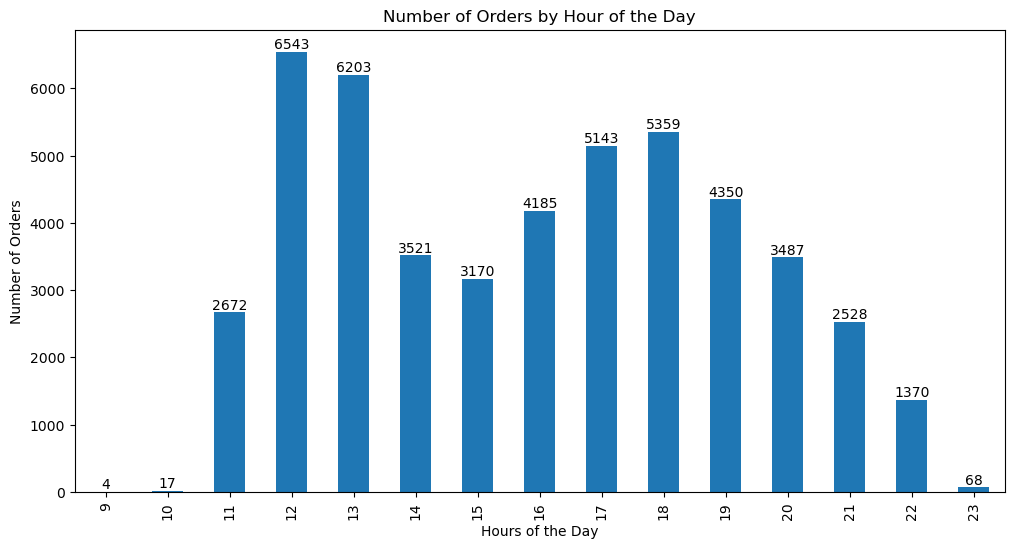

In [171]:
df["hour"].value_counts().sort_index().plot(kind = "bar" , figsize=(12,6))
plt.bar_label(plt.gca().containers[0])
plt.xlabel("Hours of the Day")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Hour of the Day")
#plt.axhline(y= df["hour"].value_counts().sort_index().mean(),color='red', linestyle='--')


#### **Intermediate: Q3. Join relevant tables to find the category-wise distribution of pizzas.** ####

In [179]:
df.groupby(by=["category"])[["quantity","Total_revenue"]].sum()

,quantity,Total_revenue
category,,
Chicken,11050,195919.50
Classic,14888,220053.10
Supreme,11987,208197.00
Veggie,11649,193690.45


#### **Intermediate: Q4.Group the orders by date and calculate the average number of pizzas ordered per day.** ####

In [192]:
df.groupby(by="date")["quantity"].sum().mean()

138.47486033519553

In [196]:
df.groupby(by="day")["quantity"].sum().sort_values(ascending=False)

day
Friday       8242
Saturday     7493
Thursday     7478
Wednesday    6946
Tuesday      6895
Monday       6485
Sunday       6035
Name: quantity, dtype: int64

#### **Intermediate: Q5.Determine the top 3 most ordered pizza types based on revenue.** ####

In [206]:
df.groupby(by=["name"])["quantity"].sum().sort_values(ascending=False).head(3)

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
Name: quantity, dtype: int64

#### **Advanced: Q1.Calculate the percentage contribution of each pizza type to total revenue.** ####

In [218]:
x=df["Total_revenue"].sum()
(df.groupby(by = "name")["Total_revenue"].sum()/x*100).sort_values(ascending=False).round(2)

name
The Thai Chicken Pizza                        5.31
The Barbecue Chicken Pizza                    5.23
The California Chicken Pizza                  5.06
The Classic Deluxe Pizza                      4.67
The Spicy Italian Pizza                       4.26
The Southwest Chicken Pizza                   4.24
The Italian Supreme Pizza                     4.09
The Hawaiian Pizza                            3.95
The Four Cheese Pizza                         3.95
The Sicilian Pizza                            3.78
The Pepperoni Pizza                           3.69
The Greek Pizza                               3.48
The Mexicana Pizza                            3.27
The Five Cheese Pizza                         3.19
The Pepper Salami Pizza                       3.12
The Italian Capocollo Pizza                   3.07
The Vegetables + Vegetables Pizza             2.98
The Prosciutto and Arugula Pizza              2.96
The Napolitana Pizza                          2.95
The Spinach and Feta Pizza

#### **Advanced: Q2.Analyze the cumulative revenue generated over time.** ####

<Axes: title={'center': 'Cumulative Revenue over Time'}, xlabel='Date', ylabel='Cumulative Revenue'>

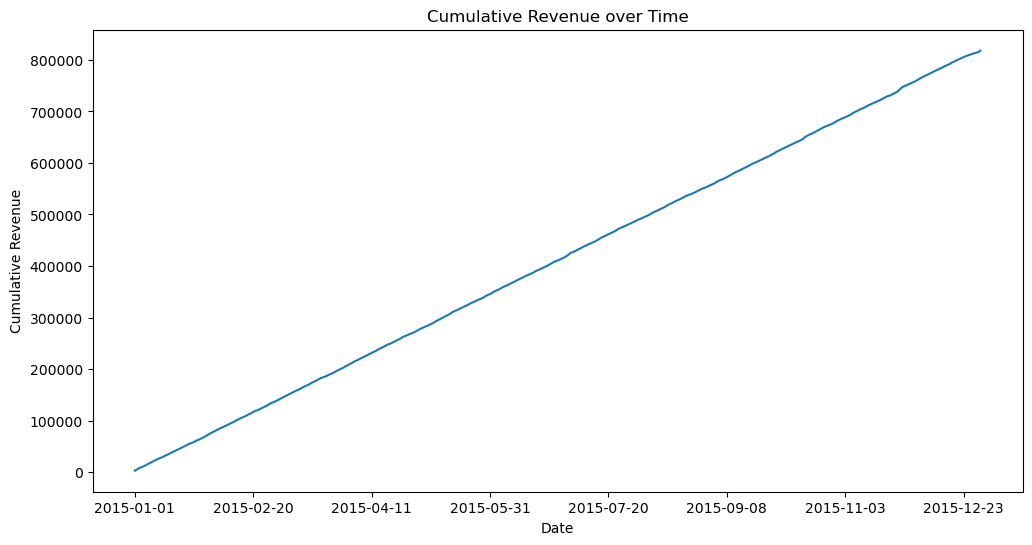

In [320]:
x=df.groupby(by = "date")["Total_revenue"].sum()
x.cumsum().plot(figsize=(12,6),title="Cumulative Revenue over Time" ,xlabel="Date",ylabel="Cumulative Revenue")

#### **Advanced: Q3.Determine the top 3 most ordered pizza types based on revenue for each pizza category.** ####

In [262]:
x=df.groupby(by=["category","name"])["quantity"].sum().reset_index()
x["rank"]= x.groupby("category")["quantity"].rank(method="dense", ascending=False)
x[x["rank"]<=3].sort_values(by=["category","rank"]).reset_index(drop=True)



,category,name,quantity,rank
0,Chicken,The Barbecue Chicken Pizza,2432,1.0
1,Chicken,The Thai Chicken Pizza,2371,2.0
2,Chicken,The California Chicken Pizza,2370,3.0
3,Classic,The Classic Deluxe Pizza,2453,1.0
4,Classic,The Hawaiian Pizza,2422,2.0
5,Classic,The Pepperoni Pizza,2418,3.0
6,Supreme,The Sicilian Pizza,1938,1.0
7,Supreme,The Spicy Italian Pizza,1924,2.0
8,Supreme,The Italian Supreme Pizza,1884,3.0
9,Veggie,The Four Cheese Pizza,1902,1.0


#### **Data Visualization** ####

Text(0, 0.5, 'Number of Orders')

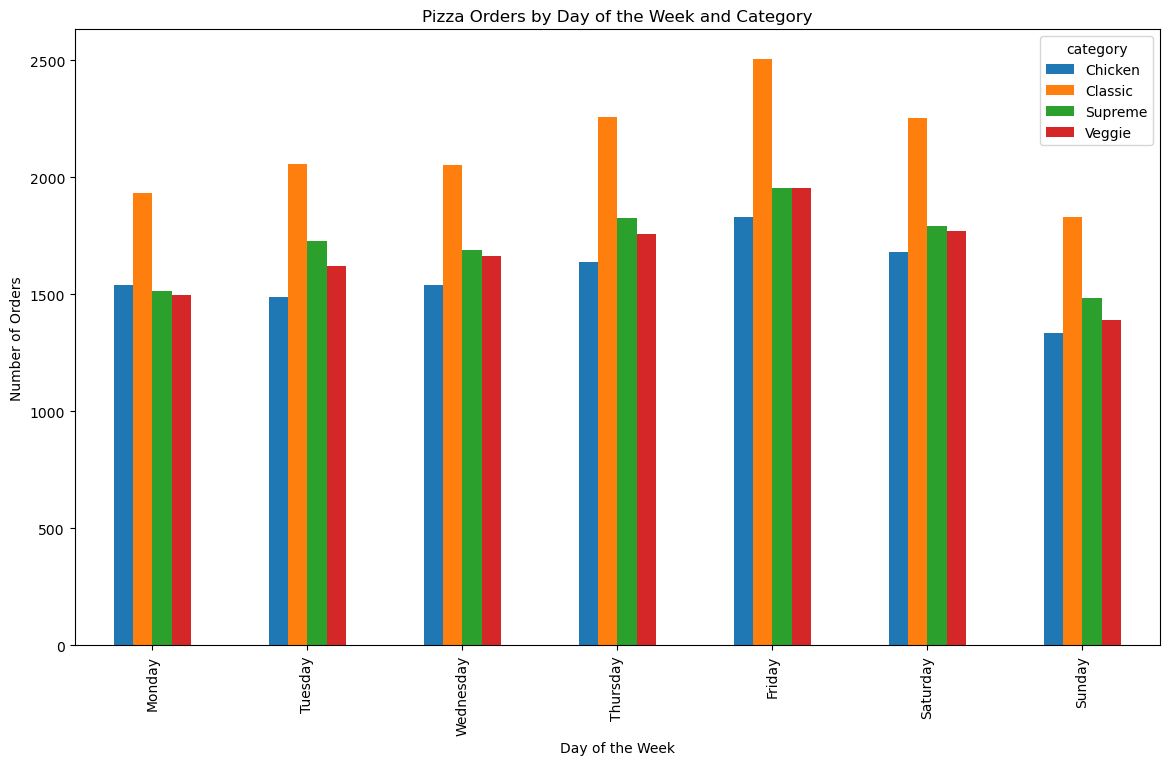

In [297]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
p=df.groupby(by = ["day","category"])["quantity"].sum().sort_values(ascending=False).unstack().reindex(weekday_order)

p.plot(kind="bar", figsize=(14,8), title="Pizza Orders by Day of the Week and Category")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")

In [316]:
df.groupby(by = "month")["Total_revenue"].sum().nlargest(5).reset_index()

,month,Total_revenue
0,July,72557.90
1,May,71402.75
2,March,70397.10
3,November,70395.35
4,January,69793.30


In [317]:
df.groupby(by = "month")["Total_revenue"].sum().nsmallest(5).reset_index()

,month,Total_revenue
0,October,64027.60
1,September,64180.05
2,December,64701.15
3,February,65159.60
4,June,68230.20


In [329]:
df.groupby(by = ["category","size"])[["quantity","Total_revenue"]].sum()
#df.pivot_table(index=["category","size"], values=["Total_revenue","quantity"], aggfunc=["sum"])

quantity  Total_revenue
category size                         
Chicken  L         4932      102339.00
         M         3894       65224.50
         S         2224       28356.00
Classic  L         4057       74518.50
         M         4112       60581.75
         S         6139       69870.25
         XL         552       14076.00
         XXL         28        1006.60
Supreme  L         4564       94258.50
         M         4046       66475.00
         S         3377       47463.50
Veggie   L         5403      104202.70
         M         3583       57101.00
         S         2663       32386.75

<module 'matplotlib.pyplot' from 'c:\\Users\\HP\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

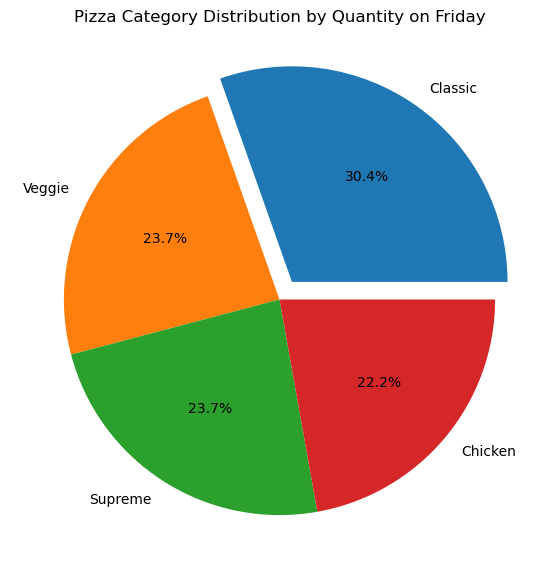

In [342]:
x=df[df["day"]== "Friday"]
x.groupby(by = "category")["quantity"].sum().sort_values(ascending=False).plot(kind="pie", autopct="%1.1f%%",explode=(0.1,0,0,0), figsize=(7,7), title="Pizza Category Distribution by Quantity on Friday")
plt.ylabel("")
plt

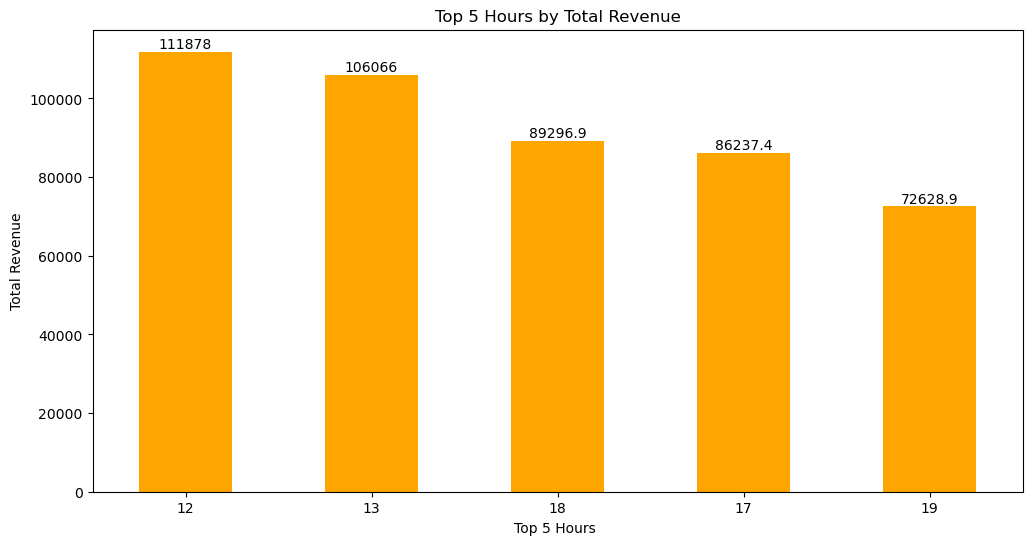

In [364]:
df.groupby(by = "hour")["Total_revenue"].sum().nlargest(5).plot(kind="bar", figsize=(12,6), title="Top 5 Hours by Total Revenue", color ="orange")
plt.bar_label(plt.gca().containers[0]) 
plt.xlabel("Top 5 Hours ")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

In [374]:
Month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
x = df[df["date"].isin(["2015-01-31","2015-02-28","2015-03-31","2015-04-30","2015-05-31","2015-06-30","2015-07-31","2015-08-31""2015-09-30","2015-10-31","2015-11-30","2015-12-31"])]
x.groupby(by="month")["Total_revenue"].sum().reindex(Month_order)
x["Total_revenue"].sum()

24289.65

In [373]:
df

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,Total_revenue,date_&_time,hour,day,month
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,2015-01-01 11:38:36,11,Thursday,January
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,2015-01-02 12:22:46,12,Friday,January
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,2015-01-03 14:22:10,14,Saturday,January
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,2015-01-03 16:54:54,16,Saturday,January
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,2015-01-04 20:55:29,20,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48176,21167,brie_carre_s,1,2015-12-27,17:39:57,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,2015-12-27 17:39:57,17,Sunday,December
48616,48244,21198,brie_carre_s,1,2015-12-28,15:39:02,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,2015-12-28 15:39:02,15,Monday,December
48617,48311,21225,brie_carre_s,1,2015-12-29,13:20:17,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,2015-12-29 13:20:17,13,Tuesday,December
48618,48456,21282,brie_carre_s,1,2015-12-31,12:09:59,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,2015-12-31 12:09:59,12,Thursday,December
